# Data Parsing & Cleansing 
## Task 1 and 2

Date: 23 AUG 2021

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: 
* pandas
* re
* numpy
* ElementTree
* lxml
* difflib

## Dataset
The dataset1.xml file consists of job advertisement records with the following attributes:
* <font color="blue"> Id </font>: *8 digit Id of the job advertisement*
* <font color="blue"> Title </font>: *Title of the advertised job position*
* <font color="blue"> Location </font>: *Location of the advertised job position*
* <font color="blue"> Company </font>: *Company (employer) of the advertised job position*
* <font color="blue"> ContractType </font>: *The contract type of the advertised job position*
* <font color="blue"> ContractTime </font>: *The contract time of the advertised job position*
* <font color="blue"> Category </font>: *The category of the advertised job position*
* <font color="blue"> Salary </font>: *Annual salary of the advertised job position*
* <font color="blue"> OpenDate </font>: *The opening time for the job application*
* <font color="blue"> CloseDate </font>: *The closing time for applying for the advertised job position*
* <font color="blue"> SourceName </font>: *The website where the job position is advertised*

## Introduction

This assessment shows how to parse data into a pandas dataframe along with resolving major data issues such as dealing with typos and spelling mistakes, irregularities like abnormal data values and data formats, violations of the integrity constraint, outliers, duplications, missing values, inconsistency. This notebook demostrates the pre-processing steps by using various functions from the pandas and numpy libraries to help to identify and resolve all these data problems. It also gives a clean dataset at the end of the notbook along with an error list which contains details about the type of difficulties faced and solution to resolve those issues.


## Importing libraries 

In [1]:
# Import libraries required 
import xml.etree.ElementTree as etree 
import pandas as pd
import numpy as np
from lxml import etree
import difflib
import re

## Task 1. Parsing Data

### 1.1. Examining and loading data
Examine "\<student\_id\>_dataset1.xml" to determine its content and structure, then load it into Python. Explain your findings here, e.g., how are the records are stored? 

In [2]:
# Code to inspect the provided data file
# Couple of notes for all code block in this notebook
## please provide proper comment on your code
## Please re-start and run all cells to make sure codes are runable and include your output in the submission
# tree = etree.parse("/content/drive/My Drive/AP/dataset1.xml")  
tree = etree.parse("dataset1.xml")
ltree = etree.parse("dataset1.xml")
print(ltree)

In [3]:
root = tree.getroot()     
root.tag

'JobAds'

In [4]:
for child in root[0][1]:           
    print(child)

<Element Id at 0x7fd301af7370>
<Element Title at 0x7fd301af72d0>
<Element Location at 0x7fd301af7410>
<Element Company at 0x7fd301af7370>
<Element ContractTime at 0x7fd301af72d0>
<Element Category at 0x7fd301af7460>
<Element Salary at 0x7fd301af7370>
<Element Date at 0x7fd301af72d0>


### 1.2 Parsing data into the required format

In [5]:
s_id = [] 
for elem in ltree.iter(tag='Id'):
       s_id.append(elem.text) 
print(len(s_id))
s_id

50703


['68285763',
 '70344003',
 '69266181',
 '71713141',
 '68100927',
 '68100908',
 '66906020',
 '66905900',
 '68285800',
 '71476095',
 '66579613',
 '69266248',
 '67931410',
 '71713245',
 '68824792',
 '71713300',
 '71713100',
 '68532181',
 '69266263',
 '68824985',
 '71233429',
 '68532116',
 '68825000',
 '69266178',
 '68824765',
 '70696128',
 '71233411',
 '69266115',
 '68100843',
 '69266155',
 '68532151',
 '71713174',
 '71907054',
 '70091240',
 '71713298',
 '69689742',
 '69266175',
 '69689629',
 '69266238',
 '68285798',
 '69266203',
 '71713191',
 '71233382',
 '71713230',
 '68824945',
 '71907082',
 '71476099',
 '70091248',
 '68824855',
 '71476107',
 '71233352',
 '69689658',
 '66905924',
 '70344041',
 '69689664',
 '68824794',
 '69266182',
 '70091315',
 '70696087',
 '68824957',
 '71233386',
 '71907205',
 '68532228',
 '68824779',
 '68824737',
 '71907196',
 '70696125',
 '68100936',
 '66905852',
 '71233334',
 '71476071',
 '71233407',
 '68824770',
 '68824973',
 '68824859',
 '70696097',
 '71907305',

In [6]:
s_title = [] 
for elem in ltree.iter(tag='Title'):
       s_title.append(elem.text) 
print(len(s_title))
s_title

50703


['Account Manager South West  Renal',
 'SCRA / SCRAII  Progression',
 'Critical Care Advisor (Insurance Sector)',
 'Scientific Director Medical Communications',
 'Territory Manager  Critical Care  M62 Corridor',
 'Area Sales Manager  Ortho',
 'Nutrition Nurse Advisor',
 'Field Trainer',
 'Medical Sales Representative  Endoscopy',
 'Senior Medical Writer  Medical Communications Agency',
 'Medical Sales Representative  North West',
 'Territory Manager South East',
 'UK Technical Lead Health Economist',
 'Clinical Study Speiclaist',
 'Publications Manager, a Great New Role for Medical Writers',
 'CRA / CRAII  Clinical Research Associate  Berkshire',
 'Nurse Manager  Bowel Colorectal',
 'NEW Epidemiologist  Pharmacovigilance Team SE',
 'Account Manager Scotland (not Glasgow)',
 'Territory Sales Representative  Cell Technology  North',
 'Associate Publication Manager',
 'Lead Medical Writer',
 'Community Nurse  Critical Care Leeds / Skipton area x****',
 'CRM Territory Manager  South West',

In [7]:
s_location = [] 
for elem in ltree.iter(tag='Location'):
       s_location.append(elem.text) 
print(len(s_location))
s_location

50703


['UK',
 'London',
 'London',
 'Manchester',
 'North West England',
 'East Midlands',
 'UK',
 'UK',
 'South West England',
 'London',
 'UK',
 'London',
 'UK',
 'Birmingham',
 'Berkshire',
 'UK',
 'London',
 'South East England',
 'Scotland',
 'UK',
 'London',
 'UK',
 'UK',
 'UK',
 'North London',
 'UK',
 'South East England',
 'UK',
 'Wales',
 'South West England',
 'Berkshire',
 'UK',
 'UK',
 'London',
 'South East London',
 'UK',
 'London',
 'London',
 'UK',
 'UK',
 'UK',
 'London',
 'Basingstoke',
 'London',
 'London',
 'London',
 'UK',
 'Buckinghamshire',
 'UK',
 'UK',
 'UK',
 'London',
 'UK',
 'UK',
 'Merseyside',
 'UK',
 'London',
 'South East England',
 'Buckinghamshire',
 'Loughborough',
 'UK',
 'Merseyside',
 'North East England',
 'South East London',
 'UK',
 'UK',
 'UK',
 'South West England',
 'UK',
 'South East England',
 'UK',
 'UK',
 'South West London',
 'Yorkshire and Humberside',
 'London',
 'UK',
 'UK',
 'UK',
 'UK',
 'Kent',
 'Surrey',
 'London',
 'London',
 'UK',
 '

In [8]:
s_company = [] 
counter = 0
counter2 = 0
for source in ltree.iter(tag='Source'):
    for row in source.findall('Row'):
        if row is not None and row.find("Company") is not None:
            s_company.append(row.find("Company").text)
            counter += 1
        else: 
            s_company.append(None)
            counter2 += 1
#         print("COUNTER:---", counter)
#         print("COUNTER2:---", counter2)
print(len(s_company))
s_company

50703


['Orrery Recruitment Ltd',
 'RBW Consulting Solutions Ltd',
 'Chadwick Nott ',
 'Executive Facilities Limited',
 'Remtec Search and Selection',
 'G2 Healthcare Resourcing',
 'Xcellin Ltd',
 'Xcellin Ltd',
 'Advance Recruitment',
 'Sam Small Recruitment',
 '20 20 Selection Ltd',
 'Remtec Search and Selection',
 'Talentmark Ltd',
 'Barrington James Ltd',
 'NonStop Recruitment',
 'Barrington James Ltd',
 'Chemistree Solutions Limited',
 'NonStop Recruitment',
 'Remtec Search and Selection',
 'Projectus Ltd',
 'Head Office',
 'ID Search and Selection Ltd',
 'Evolve Selection Limited',
 'Remtec Search and Selection',
 'Evolve Selection Limited',
 'Remtec Search and Selection',
 'NonStop Recruitment',
 'NonStop Recruitment',
 'Apodi Ltd',
 'Guided Solutions Ltd',
 'ID Search and Selection Ltd',
 'Progress Sales Recruitment Ltd',
 'Flame Health',
 'RBW Consulting Solutions Ltd',
 'Delta Consultants',
 'BMS Sales Specialists LLP',
 'Kirkham Young Ltd',
 'The Vacancy Management Company',
 'Barr

In [9]:
s_contract_type = [] 
counter = 0
counter2 = 0
for source in ltree.iter(tag='Source'):
    for row in source.findall('Row'):
        if row is not None and row.find("ContractType") is not None:
            s_contract_type.append(row.find("ContractType").text)
#             counter += 1
        else: 
            s_contract_type.append(None)
#             counter2 += 1
print(len(s_contract_type))
s_contract_type

50703


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [10]:
s_contract_time = [] 
counter = 0
counter2 = 0
for source in ltree.iter(tag='Source'):
    for row in source.findall('Row'):
        if row is not None and row.find("ContractTime") is not None:
            s_contract_time.append(row.find("ContractTime").text)
#             counter += 1
        else: 
            s_contract_time.append(None)
#             counter2 += 1
print(len(s_contract_time))
s_contract_time

50703


['permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 None,
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'permanent',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'permanent',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'perm

In [11]:
s_category = [] 
for elem in ltree.iter(tag='Category'):
       s_category.append(elem.text) # retrieving value of the attribute id in an item
print(len(s_category))
s_category

50703


['Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'Healthca

In [12]:
s_salary = [] 
counter = 0
counter2 = 0
for source in ltree.iter(tag='Source'):
    for row in source.findall('Row'):
        if row is not None and row.find("Salary") is not None:
            s_salary.append(row.find("Salary").text)
#             counter += 1
        else: 
            s_salary.append(None)
#             counter2 += 1
print(len(s_salary))
s_salary

50703


['45000',
 '38000',
 '22500',
 '50000',
 '36000',
 '35000',
 '24500',
 '45000',
 '36000',
 '42500',
 '21000',
 '32000',
 '50000',
 '31500',
 '45000',
 '25000',
 '60000',
 '40000',
 '0',
 '26500',
 '28500',
 '45000',
 '25000',
 '40000',
 '55000',
 '30500',
 '32500',
 '52500',
 '55000',
 '50000',
 '40000',
 '0',
 '50000',
 '55000',
 '23000',
 '26000',
 '45000',
 '45000',
 '30000',
 '33000',
 '0',
 '44000',
 '35000',
 '0',
 '34000',
 '48000',
 '37500',
 '45000',
 '43000',
 '38000',
 '47500',
 '0',
 '46000',
 '25000',
 '33500',
 '25000',
 '40000',
 '35000',
 '40000',
 '32000',
 '37500',
 '37500',
 '34750 To 35250',
 '55000',
 '60000',
 '37500',
 '35000',
 '35000',
 '60000',
 '0',
 '48660',
 '40000',
 '55000',
 '30000',
 '41000',
 '35000',
 '22000',
 '55000',
 '25000 pa',
 '37500',
 '30000',
 '47500',
 '31000',
 '28000',
 '25000',
 '56000',
 '17500',
 '45000',
 '38000',
 '41500',
 '45000',
 '60000',
 '27500',
 '35000',
 '35000',
 '60000',
 '40000',
 '35000',
 '35000',
 '25000',
 '50880',
 '

In [13]:
s_open_date = [] 
for elem in ltree.iter(tag='Date'):
       s_open_date.append(elem.attrib['Open']) # retrieving value of the attribute id in an item
print(len(s_open_date))
s_open_date

50703


['20130808T000000',
 '20120401T120000',
 '20120816T150000',
 '20120508T120000',
 '20130509T150000',
 '20130819T000000',
 '20130930T150000',
 '20121108T000000',
 '20120822T000000',
 '20120104T150000',
 '20130204T000000',
 '20120408T000000',
 '20120509T120000',
 '20130221T150000',
 '20131027T000000',
 '20120301T120000',
 '20120523T000000',
 '20120704T150000',
 '20120526T120000',
 '20120824T150000',
 '20120805T150000',
 '20130830T000000',
 '20120526T150000',
 '20130502T000000',
 '20120710T150000',
 '20130324T120000',
 '20131009T120000',
 '20120329T150000',
 '20131210T150000',
 '20131209T120000',
 '20130309T000000',
 '20130526T120000',
 '20130618T120000',
 '20120526T120000',
 '20130816T000000',
 '20120204T000000',
 '20120221T150000',
 '20121127T120000',
 '20120106T150000',
 '20121015T150000',
 '20131102T000000',
 '20130609T120000',
 '20120923T120000',
 '20130226T150000',
 '20120723T000000',
 '20130707T150000',
 '20120627T120000',
 '20121010T150000',
 '20130921T120000',
 '20120406T150000',


In [14]:
#close date
s_close_date = [] 
for elem in ltree.iter(tag='Date'):
       s_close_date.append(elem.attrib['Close']) # retrieving value of the attribute id in an item
print(len(s_close_date))
s_close_date

50703


['20131106T000000',
 '20120630T120000',
 '20121015T150000',
 '20120607T120000',
 '20130708T150000',
 '20130918T000000',
 '20131014T150000',
 '20130107T000000',
 '20121120T000000',
 '20120304T150000',
 '20130405T000000',
 '20120707T000000',
 '20120708T120000',
 '20130522T150000',
 '20131226T000000',
 '20120530T120000',
 '20120722T000000',
 '20121002T150000',
 '20120725T120000',
 '20121023T150000',
 '20121004T150000',
 '20131128T000000',
 '20120824T150000',
 '20130701T000000',
 '20120908T150000',
 '20130622T120000',
 '20140107T120000',
 '20120428T150000',
 '20140208T150000',
 '20140309T120000',
 '20130408T000000',
 '20130625T120000',
 '20130817T120000',
 '20120824T120000',
 '20130915T000000',
 '20120305T000000',
 '20120521T150000',
 '20130126T120000',
 '20120306T150000',
 '20130113T150000',
 '20140131T000000',
 '20130907T120000',
 '20121007T120000',
 '20130527T150000',
 '20120921T000000',
 '20131005T150000',
 '20120925T120000',
 '20121209T150000',
 '20131120T120000',
 '20120705T150000',


In [15]:
s_source_name = [] 
counter = 0
counter2 = 0
for source in ltree.iter(tag='Source'):
    for row in source.findall('Row'):
        if source is not None and source.find("SourceName") is not None:
            s_source_name.append(source.find("SourceName").text)
#             counter += 1
        else: 
            s_source_name.append(None)
#             counter2 += 1
print(len(s_source_name))
s_source_name

50703


['emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',
 'emedcareers.com',


In [16]:
# initialise all the fields to be an empty list
dataDict = {}
dataDict['Id'] = s_id
dataDict['Title'] = s_title
dataDict['Location'] = s_location
dataDict['Company'] = s_company
dataDict['ContractTime'] = s_contract_time
dataDict['ContractType'] = s_contract_type
dataDict['Category'] = s_category
dataDict['Salary'] = s_salary
dataDict['OpenDate'] = s_open_date
dataDict['CloseDate'] = s_close_date
dataDict['SourceName'] = s_source_name

In [17]:
data = pd.DataFrame(dataDict)
# data.index.name = 'Id'
 # delete the extra ID column
# data.drop('Id', 1, inplace = True)
data.columns = ['Id', 'Title', 'Location', 'Company', 'ContractTime', 'ContractType', 'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName' ]
# data.drop(columns=data.columns[0], axis=1, inplace=True)
data.head()

,Id,Title,Location,Company,ContractTime,ContractType,Category,Salary,OpenDate,CloseDate,SourceName
0,68285763,Account Manager South West Renal,UK,Orrery Recruitment Ltd,permanent,None,Healthcare & Nursing Jobs,45000,20130808T000000,20131106T000000,emedcareers.com
1,70344003,SCRA / SCRAII Progression,London,RBW Consulting Solutions Ltd,permanent,None,Healthcare & Nursing Jobs,38000,20120401T120000,20120630T120000,emedcareers.com
2,69266181,Critical Care Advisor (Insurance Sector),London,Chadwick Nott,permanent,None,Healthcare & Nursing Jobs,22500,20120816T150000,20121015T150000,emedcareers.com
3,71713141,Scientific Director Medical Communications,Manchester,Executive Facilities Limited,permanent,None,Healthcare & Nursing Jobs,50000,20120508T120000,20120607T120000,emedcareers.com
4,68100927,Territory Manager Critical Care M62 Corridor,North West England,Remtec Search and Selection,permanent,None,Healthcare & Nursing Jobs,36000,20130509T150000,20130708T150000,emedcareers.com


## Task 2. Auditing and cleansing the loaded data

### Task 2.1 Overviewing Data

In [18]:
# Identify Data Problems
# Check datatype of the data
data.dtypes

Id              object
Title           object
Location        object
Company         object
ContractTime    object
ContractType    object
Category        object
Salary          object
OpenDate        object
CloseDate       object
SourceName      object
dtype: object

In [19]:
data.shape

(50703, 11)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50703 entries, 0 to 50702
Data columns (total 11 columns):
Id              50703 non-null object
Title           50703 non-null object
Location        50703 non-null object
Company         47622 non-null object
ContractTime    46403 non-null object
ContractType    26849 non-null object
Category        50703 non-null object
Salary          50030 non-null object
OpenDate        50703 non-null object
CloseDate       50703 non-null object
SourceName      50703 non-null object
dtypes: object(11)
memory usage: 4.3+ MB


In [21]:
data.describe()

,Id,Title,Location,Company,ContractTime,ContractType,Category,Salary,OpenDate,CloseDate,SourceName
count,50703,50703,50703,47622,46403,26849,50703,50030,50703,50703,50703
unique,50703,50700,489,8664,5,5,8,3477,2194,2416,107
top,69063122,Senior Credit Risk Modeller Leeds,UK,,permanent,full_time,IT Jobs,35000,20120408T120000,20131222T120000,totaljobs.com
freq,1,2,7622,1381,30335,11759,13125,1728,43,38,8387


### 2.2 Create an Error Recorder
A function <font color="blue"> updateErrorList </font> is introduced below to update the error records. It takes an index ```indexOfdf```, the ```Id``` of the job ad, a column name ```ColumnName```, the original value ```Orignal```, the modified value ```Modified```, the error type ```ErrorType```, and and entry ```Fixing``` for the way the error was fixed as input, and appends all these records to the "error_list".

In [22]:
#Error List
error_list = pd.DataFrame(columns=['indexOfdf', 'Id', 'ColumnName', 'Original', 'Modified', 'ErrorType','Fixing'])
error_list

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing


In [23]:
indices = data.index 
indices
df_ids = data.Id

In [24]:
# Function to update error records
def updateErrorList(indexOfdf, Id, ColumnName, Original, Modified, ErrorType, Fixing):
    errorItem=[indexOfdf, Id, ColumnName, Original, Modified, ErrorType,Fixing]
    error_list.loc[len(error_list)]=errorItem

In [25]:
# Column Names of the dataframe
data.columns

Index(['Id', 'Title', 'Location', 'Company', 'ContractTime', 'ContractType',
       'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName'],
      dtype='object')

The columns should be in appropriate format and from the above output it is evident that all the columns are in object format. Therefore, every column needs to be converted to its respective datatypes.

### 2.3 Cleansing Dataframe
### 2.3.1 Irregularities: Incorrect Datatypes

In [26]:
# Fix the problems
data['Id'] = data['Id'].astype('int64')
data['Title'] = data['Title'].astype('str')
data['Location'] = data['Location'].astype('str')
data['Company']= data['Company'].astype('str')
data['ContractTime'] = data['ContractTime'].astype('str')
data['ContractType'] = data['ContractType'].astype('str')
data['Category'] = data['Category'].astype('str')
data['Salary'] = data['Salary'].astype('str')
data['CloseDate'] = data['CloseDate'].astype('datetime64')
data['OpenDate'] = pd.to_datetime(data['OpenDate'], errors='coerce')
data['SourceName'] = data['SourceName'].astype('str')

In [27]:
# Update Error list
updateErrorList('ALL', 'ALL', 'Id', 'object', 'int64', 'Incorrect Datatype','Changed the datatype from object to int64') 
updateErrorList('ALL', 'ALL', 'Title', 'object', 'string', 'Incorrect Datatype','Changed the datatype from object to string') 
updateErrorList('ALL', 'ALL', 'Location', 'object', 'string', 'Incorrect Datatype','Changed the datatype from object to string') 
updateErrorList('ALL', 'ALL', 'Company', 'object', 'string', 'Incorrect Datatype','Changed the datatype from object to string') 
updateErrorList('ALL', 'ALL', 'ContractTime', 'object', 'string', 'Incorrect Datatype','Changed the datatype from object to string') 
updateErrorList('ALL', 'ALL', 'ContractType', 'object', 'string', 'Incorrect Datatype','Changed the datatype from object to string') 
updateErrorList('ALL', 'ALL', 'Category', 'object', 'string', 'Incorrect Datatype','Changed the datatype from object to string') 
updateErrorList('ALL', 'ALL', 'CloseDate', 'object', 'datetime64', 'Incorrect Datatype','Changed the datatype from object to datetime64') 
updateErrorList('ALL', 'ALL', 'OpenDate', 'object', 'datetime64', 'Incorrect Datatype','Changed the datatype from object to datetime64') 
updateErrorList('ALL', 'ALL', 'SourceName', 'object', 'string', 'Incorrect Datatype','Changed the datatype from object to string') 

updateErrorList('ALL', 'ALL', 'Salary', 'object', 'string', 'Incorrect Datatype','Changed the datatype from object to string') 



### 2.3.2 Normalising ```Salary```

There were inconsistencies in ```Salary``` column of the dataframe. There were values such as:
'30k', '30K', '30000/Year', '30000 pa', '10.88 per hour', '10.88 p/h', '32250 - 32750' or '32250 To 32750'.

To normalise these records, it was appropriate to use regex. A function <font color="blue"> normalised</font> is defined to remove each consistency using regex in the column. This function is applied to the ```Salary``` column and inconsistencies were removed.

In [28]:

def normalised(sal_string):
    # case 1, extract number with salary in format 'num - num'
    result = re.fullmatch(r'(\d*) - (\d*)', sal_string)
    if result:
        return (int(result.group(1))+int(result.group(2)))/2
    
    # case 2, extract number with salary in format 'num To num'
    result1 = re.fullmatch(r'(\d*) To (\d*)', sal_string)
    if result1:
        return (int(result1.group(1))+int(result1.group(2)))/2
    
    # case 3, extract num in annual salary strings with other format '/Year' and 'pa'
    result2 = re.fullmatch(r'(\d{5})(?: pa|[/\\][yY]ear)', sal_string)
    if result2:
        return float(result2.group(1))
    
    # case 4, extract num in strings with hour ' per hour' salary
    result3 = re.fullmatch(r'(\d+\.?\d*)(?: p.{1,4}h.*)', sal_string)
    if result3:
        return float(result3.group(1))*37.5*52
    
    # case 5, extract num in strings with five digit salaries 
    result4 = re.fullmatch(r'(\d{5})', sal_string)
    if result4:
        return int(result4.group(1))



In [29]:
sal_condition = data.Salary.str.contains(r'(\d*) - (\d*)')
# type(sal_condition)
sal_applies_indices = indices[sal_condition]
sal_applies_indices

/Users/pallavibhimte/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Int64Index([  694,   899,   970,  1872,  3706,  3927,  4048,  4177,  4190,
             4262,  5545,  5574,  5917,  6291,  6908,  7501,  8207,  8230,
             9400,  9739,  9757, 10002, 11686, 12834, 13316, 13936, 13964,
            15303, 16167, 16853, 18115, 18196, 18355, 18558, 20341, 20379,
            20569, 20873, 21140, 21215, 21776, 22003, 22147, 22422, 23006,
            23892, 24270, 25054, 27215, 28825, 30075, 30223, 30343, 30692,
            31437, 32157, 33195, 33322, 33632, 35060, 35198, 35298, 35301,
            36077, 36534, 36564, 36677, 38505, 38535, 38587, 38805, 39384,
            39488, 39598, 39843, 39943, 40275, 40466, 40820, 41072, 41264,
            41316, 41758, 42822, 42919, 43319, 43799, 43912, 44431, 45046,
            45054, 45317, 46015, 46188, 46588, 46669, 47402, 47977, 48008,
            48834],
           dtype='int64')

In [30]:
data['Salary_filled'] = data['Salary'].apply(lambda x: normalised(x))

In [31]:
# update erlist
for ind in sal_applies_indices:  
    updateErrorList(ind, data.loc[ind,'Id'], 'Salary', data.loc[ind, 'Salary'], data.loc[ind,'Salary_filled'], 'Inconsistent data',"Replaced with right string") 
     

In [32]:
data.drop(['Salary_filled'], axis=1, inplace=True)

In [33]:
error_list

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,object,int64,Incorrect Datatype,Changed the datatype from object to int64
1,ALL,ALL,Title,object,string,Incorrect Datatype,Changed the datatype from object to string
2,ALL,ALL,Location,object,string,Incorrect Datatype,Changed the datatype from object to string
3,ALL,ALL,Company,object,string,Incorrect Datatype,Changed the datatype from object to string
4,ALL,ALL,ContractTime,object,string,Incorrect Datatype,Changed the datatype from object to string
...,...,...,...,...,...,...,...
106,46669,59124496,Salary,28250 - 28750,28500,Inconsistent data,Replaced with right string
107,47402,65321674,Salary,44750 - 45250,45000,Inconsistent data,Replaced with right string
108,47977,52314212,Salary,29750 - 30250,30000,Inconsistent data,Replaced with right string
109,48008,70736475,Salary,29750 - 30250,30000,Inconsistent data,Replaced with right string


In [34]:
sal_condition = data.Salary.str.contains(r'(\d*) To (\d*)')
# type(sal_condition)
sal_applies_indices = indices[sal_condition]
sal_applies_indices

Int64Index([   62,  1037,  1472,  2748,  3933,  4058,  4893,  5025,  5089,
             5560,  5650,  6045,  6091,  6676,  7482,  7836,  8590,  9087,
             9354,  9767, 10033, 10276, 11138, 11304, 12178, 13910, 14595,
            14696, 16309, 16668, 16986, 17010, 17336, 17501, 18434, 18562,
            18677, 19100, 19374, 19479, 20284, 20374, 20856, 21143, 21546,
            22062, 22071, 23519, 23737, 24762, 25114, 25745, 26572, 26607,
            26839, 26926, 27386, 28279, 28662, 28669, 28939, 29882, 31369,
            32090, 32297, 32622, 33110, 34965, 35639, 36492, 36751, 37530,
            37571, 37683, 38931, 39165, 39362, 39466, 39845, 40475, 40484,
            41152, 41294, 41319, 41805, 42037, 42357, 43217, 43312, 43708,
            44059, 44393, 44630, 45771, 46892, 47519, 48323, 50097, 50207,
            50208],
           dtype='int64')

In [35]:
data['Salary_filled'] = data['Salary'].apply(lambda x: normalised(x))

# update erlist
for ind in sal_applies_indices:  
    updateErrorList(ind, data.loc[ind,'Id'], 'Salary', data.loc[ind, 'Salary'], data.loc[ind,'Salary_filled'], 'Inconsistent data',"Replaced with right string") 
     

data.drop(['Salary_filled'], axis=1, inplace=True)

In [37]:
sal_condition = data.Salary.str.contains(r'(\d{5})(?: pa|[/\\][yY]ear)')
# type(sal_condition)
sal_applies_indices = indices[sal_condition]
sal_applies_indices

data['Salary_filled'] = data['Salary'].apply(lambda x: normalised(x))

# update erlist
for ind in sal_applies_indices:  
    updateErrorList(ind, data.loc[ind,'Id'], 'Salary', data.loc[ind, 'Salary'], data.loc[ind,'Salary_filled'], 'Inconsistent data',"Replaced with right string") 
     

data.drop(['Salary_filled'], axis=1, inplace=True)

In [38]:
sal_condition = data.Salary.str.contains(r'(\d+\.?\d*)(?: p.{1,4}h.*)')
# type(sal_condition)
sal_applies_indices = indices[sal_condition]
sal_applies_indices

data['Salary_filled'] = data['Salary'].apply(lambda x: normalised(x))

# update erlist
for ind in sal_applies_indices:  
    updateErrorList(ind, data.loc[ind,'Id'], 'Salary', data.loc[ind, 'Salary'], data.loc[ind,'Salary_filled'], 'Inconsistent data',"Replaced with right string") 
     

data.drop(['Salary_filled'], axis=1, inplace=True)

In [39]:
error_list

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,object,int64,Incorrect Datatype,Changed the datatype from object to int64
1,ALL,ALL,Title,object,string,Incorrect Datatype,Changed the datatype from object to string
2,ALL,ALL,Location,object,string,Incorrect Datatype,Changed the datatype from object to string
3,ALL,ALL,Company,object,string,Incorrect Datatype,Changed the datatype from object to string
4,ALL,ALL,ContractTime,object,string,Incorrect Datatype,Changed the datatype from object to string
...,...,...,...,...,...,...,...
511,11796,70761606,Salary,10.66 per hour,20787,Inconsistent data,Replaced with right string
512,24155,71193035,Salary,15.52 per hour,30264,Inconsistent data,Replaced with right string
513,32860,67446285,Salary,13.33 per hour,25993.5,Inconsistent data,Replaced with right string
514,34934,69617629,Salary,16.55 p/h,32272.5,Inconsistent data,Replaced with right string


In [40]:
# Apply normalised function
data['Salary'] = data['Salary'].apply(lambda x: normalised(x))

In [41]:
data

,Id,Title,Location,Company,ContractTime,ContractType,Category,Salary,OpenDate,CloseDate,SourceName
0,68285763,Account Manager South West Renal,UK,Orrery Recruitment Ltd,permanent,None,Healthcare & Nursing Jobs,45000.0,2013-08-08 00:00:00,2013-11-06 00:00:00,emedcareers.com
1,70344003,SCRA / SCRAII Progression,London,RBW Consulting Solutions Ltd,permanent,None,Healthcare & Nursing Jobs,38000.0,2012-04-01 12:00:00,2012-06-30 12:00:00,emedcareers.com
2,69266181,Critical Care Advisor (Insurance Sector),London,Chadwick Nott,permanent,None,Healthcare & Nursing Jobs,22500.0,2012-08-16 15:00:00,2012-10-15 15:00:00,emedcareers.com
3,71713141,Scientific Director Medical Communications,Manchester,Executive Facilities Limited,permanent,None,Healthcare & Nursing Jobs,50000.0,2012-05-08 12:00:00,2012-06-07 12:00:00,emedcareers.com
4,68100927,Territory Manager Critical Care M62 Corridor,North West England,Remtec Search and Selection,permanent,None,Healthcare & Nursing Jobs,36000.0,2013-05-09 15:00:00,2013-07-08 15:00:00,emedcareers.com
...,...,...,...,...,...,...,...,...,...,...,...
50698,69005978,Relations Officer,Scotland,None,permanent,None,Healthcare & Nursing Jobs,55752.0,2012-04-14 15:00:00,2012-06-13 15:00:00,scotsman.com
50699,70769728,Magazine Advertising Sales Executive (Sports &...,UK,None,permanent,None,Sales Jobs,11000.0,2013-10-29 12:00:00,2013-12-28 12:00:00,scotsman.com
50700,68704692,Graduate SoftwareWeb Developer,London,UNKNOWN auto added by vacany import,,,IT Jobs,25000.0,2012-01-12 12:00:00,2012-03-12 12:00:00,grb.uk.com
50701,72342224,Care Group Manager – Emergency Care,Southampton,University Hospitals Southampton NHS Foundatio...,permanent,-,Healthcare & Nursing Jobs,31227.0,2012-06-07 12:00:00,2012-09-05 12:00:00,hsjjobs.com


In [42]:
# Change the datatype of the Salary as float
data['Salary'] = data['Salary'].astype('float64')

In [43]:
# Update the errorlist
updateErrorList('ALL', 'ALL', 'Salary', 'string', 'float64', 'Incorrect Datatype','Changed the datatype from string to float64') 

The dataframe is now converted to the requirement of this assessment and the format of the dataframe is as follows:

|Column | Required Data Type|
| :-           |       :- |
|Id            |   integer|
|Title         |    string|
|Location      |    string|
|Company       |    string|
|ContractTime  |    string|
|ContractType  |    string|
|Category      |    string|
|Salary        |     float|
|OpenDate      |  datetime|
|CloseDate     |  datetime|
|SourceName    |    string|

In [44]:
# Required Datatype for each column
data.apply(lambda x: pd.api.types.infer_dtype(x.values))

/Users/pallavibhimte/opt/anaconda3/lib/python3.7/site-packages/pandas/core/apply.py:285: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  values, self.f, axis=self.axis, dummy=dummy, labels=labels


Id               integer
Title             string
Location          string
Company           string
ContractTime      string
ContractType      string
Category          string
Salary          floating
OpenDate        datetime
CloseDate       datetime
SourceName        string
dtype: object

### 2.3.3 Missing Values
A function <font color="blue">  num_missing  </font> is defined to get number of missing values in each column. There were 3452 missing values found in ```Salary``` column and one missing value in ```OpenDate```. To remove these missing values, appropriate methods are used as shown below: 

In [45]:
# Define function to check for missing values in the dataframe
def num_missing(x):
    return sum(x.isnull())

# Apply to column
print("Missing values in each column:")
print(data.apply(num_missing, axis=0))

Missing values in each column:
Id                 0
Title              0
Location           0
Company            0
ContractTime       0
ContractType       0
Category           0
Salary          3452
OpenDate           1
CloseDate          0
SourceName         0
dtype: int64


### Removing missing values from ```Salary``` column
To remove the missing values from this column, fillna() method was used and all the missing values were replaced with the mean of other salaries.

In [46]:
# retrive the indices 
condition = data['Salary'].isnull()
applies_indices = indices[condition]
applies_indices
# df_ids = data.Id


Int64Index([   18,    31,    40,    43,    51,    69,   103,   117,   134,
              235,
            ...
            50503, 50506, 50516, 50539, 50541, 50553, 50640, 50654, 50666,
            50696],
           dtype='int64', length=3452)

In [47]:
data['Salary_without_NA'] = data['Salary'].fillna(data['Salary'].mean())


In [48]:
# update erlist
for ind in applies_indices:
    updateErrorList(ind, data.loc[ind,'Id'], 'Salary', 'NaN', data.loc[ind,'Salary_without_NA'], 'Missing Value',"Replaced missing value with mean value of the Salary column") 

In [49]:
# Replacing the na values by mean of other salaries 
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())
data.drop(['Salary_without_NA'], axis=1, inplace=True)

In [50]:
# Check if missing values replaced
print("Missing values per column:")
print(data.apply(num_missing, axis=0))

Missing values per column:
Id              0
Title           0
Location        0
Company         0
ContractTime    0
ContractType    0
Category        0
Salary          0
OpenDate        1
CloseDate       0
SourceName      0
dtype: int64


### Removing missing values from ```OpenDate``` column

In [51]:
# Return the row with missing value in OpenDate
data[data['OpenDate'].isna()]

,Id,Title,Location,Company,ContractTime,ContractType,Category,Salary,OpenDate,CloseDate,SourceName
41605,53863795,"Staff Nurses Southwark, London",Southwark,None,None,None,Healthcare & Nursing Jobs,25707.0,NaT,2012-04-30 12:00:00,careworx.co.uk


Since, there are 50703 records in the dataframe, removing one row with a missing value in ```OpenDate``` column would not have a huge impact on the data analysis to be performed in the future. Therefore, one row is deleted and now the data contains only 50702 rows.

In [52]:
# Drop the entire row with OpenDate missing value
data['OpenDate'] = data['OpenDate'].dropna()

In [53]:
# Deleting the row with index value 41605
data=data.drop(data.index[41605])
data

,Id,Title,Location,Company,ContractTime,ContractType,Category,Salary,OpenDate,CloseDate,SourceName
0,68285763,Account Manager South West Renal,UK,Orrery Recruitment Ltd,permanent,None,Healthcare & Nursing Jobs,45000.0,2013-08-08 00:00:00,2013-11-06 00:00:00,emedcareers.com
1,70344003,SCRA / SCRAII Progression,London,RBW Consulting Solutions Ltd,permanent,None,Healthcare & Nursing Jobs,38000.0,2012-04-01 12:00:00,2012-06-30 12:00:00,emedcareers.com
2,69266181,Critical Care Advisor (Insurance Sector),London,Chadwick Nott,permanent,None,Healthcare & Nursing Jobs,22500.0,2012-08-16 15:00:00,2012-10-15 15:00:00,emedcareers.com
3,71713141,Scientific Director Medical Communications,Manchester,Executive Facilities Limited,permanent,None,Healthcare & Nursing Jobs,50000.0,2012-05-08 12:00:00,2012-06-07 12:00:00,emedcareers.com
4,68100927,Territory Manager Critical Care M62 Corridor,North West England,Remtec Search and Selection,permanent,None,Healthcare & Nursing Jobs,36000.0,2013-05-09 15:00:00,2013-07-08 15:00:00,emedcareers.com
...,...,...,...,...,...,...,...,...,...,...,...
50698,69005978,Relations Officer,Scotland,None,permanent,None,Healthcare & Nursing Jobs,55752.0,2012-04-14 15:00:00,2012-06-13 15:00:00,scotsman.com
50699,70769728,Magazine Advertising Sales Executive (Sports &...,UK,None,permanent,None,Sales Jobs,11000.0,2013-10-29 12:00:00,2013-12-28 12:00:00,scotsman.com
50700,68704692,Graduate SoftwareWeb Developer,London,UNKNOWN auto added by vacany import,,,IT Jobs,25000.0,2012-01-12 12:00:00,2012-03-12 12:00:00,grb.uk.com
50701,72342224,Care Group Manager – Emergency Care,Southampton,University Hospitals Southampton NHS Foundatio...,permanent,-,Healthcare & Nursing Jobs,31227.0,2012-06-07 12:00:00,2012-09-05 12:00:00,hsjjobs.com


In [54]:
# NO missing value returned
data[data['OpenDate'].isna()]

,Id,Title,Location,Company,ContractTime,ContractType,Category,Salary,OpenDate,CloseDate,SourceName


In [55]:
data['OpenDate'].value_counts()

2012-04-08 12:00:00    43
2013-06-26 15:00:00    42
2012-05-19 12:00:00    41
2013-08-13 15:00:00    40
2013-01-27 15:00:00    40
                       ..
2012-01-26 12:00:00    10
2012-01-01 15:00:00    10
2013-01-08 12:00:00     9
2013-01-21 15:00:00     9
2012-10-26 00:00:00     9
Name: OpenDate, Length: 2193, dtype: int64

In [56]:
updateErrorList('41605', '53863795', 'OpenDate', 'NaT', 'deleted', 'Missing Value','Deleted the row') 

### 2.3.4 Remove Inconsistencies
The ```Salary``` column seemed to contain values with more than 2 decimal points. To remove this inconsistency, round() function was used and all the values with more than two decimal points were replaced with values upto two decimal points.

In [57]:
updateErrorList('ALL', 'All', 'Salary', 'float value with more than 2 decimal points', 'float value with 2 decimal points', 'Inconsistent Data','Round off upto 2 decimal points') 

In [58]:
# Round off upto 2 decimal points
data['Salary'] = data['Salary'].round(2)

In [59]:
data['Salary'].head(5)

0    45000.0
1    38000.0
2    22500.0
3    50000.0
4    36000.0
Name: Salary, dtype: float64

### 2.3.5 Typos: '-', 'None', ' ' or 'N/A'

Total three columns ```Company```, ```ContractType``` and ```ContractTime``` contains meaningless values such as '-', 'None', ' ' or 'N/A'. Each of this value is replaced by 'non-specified'.

In [60]:
# Replace '-', 'None', ' ' or 'N/A' by a NaN value
data['Company'].replace('None', np.nan, inplace=True)
data['Company'].replace(' ', np.nan, inplace=True)
data['Company'].replace('N/A', np.nan, inplace=True)
data['Company'].replace('-', np.nan, inplace=True)

In [61]:
# Replace '-', 'None', ' ' or 'N/A' by a NaN value
data['ContractType'].replace('None', np.nan, inplace=True)
data['ContractType'].replace(' ', np.nan, inplace=True)
data['ContractType'].replace('N/A', np.nan, inplace=True)
data['ContractType'].replace('-', np.nan, inplace=True)

In [62]:
# Replace '-', 'None', ' ' or 'N/A' by a NaN value
data['ContractTime'].replace('None', np.nan, inplace=True)
data['ContractTime'].replace(' ', np.nan, inplace=True)
data['ContractTime'].replace('N/A', np.nan, inplace=True)
data['ContractTime'].replace('-', np.nan, inplace=True)

In [63]:
# NaN values inserted in Company, ContractType and ContractTime
data.isnull().sum()

Id                  0
Title               0
Location            0
Company          5330
ContractTime    14796
ContractType    37430
Category            0
Salary              0
OpenDate            0
CloseDate           0
SourceName          0
dtype: int64

In [64]:
# Define indices
indices = data.index

In [65]:
condition1 = data['Company'].isnull()
applies_indices1 = indices[condition1]
applies_indices1

Int64Index([  861,   862,   863,   864,   865,   866,   867,   868,   869,
              870,
            ...
            50582, 50583, 50584, 50585, 50586, 50587, 50696, 50697, 50698,
            50699],
           dtype='int64', length=5330)

In [66]:
data['Company_without_NA'] = data['Company'].fillna("non-specified", inplace=True)

In [67]:
# update errror_list
for ind in applies_indices1:
    updateErrorList(ind, data.loc[ind,'Id'], 'Company', 'NaN', data.loc[ind,'Company_without_NA'], 'Missing Value',"Replaced missing value with non-specified") 

In [69]:
data['Company'].value_counts()

non-specified                        5330
UKStaffsearch                         432
Randstad                              371
CVbrowser                             309
Matchtech Group plc.                  230
                                     ... 
Renfrewshire Council                    1
RK Law Solicitors                       1
Braye Beach Hotel                       1
Chiltern and Glaisdale Nurseries        1
Tara Professional Recruitment Ltd       1
Name: Company, Length: 8662, dtype: int64

In [70]:
data['Company'] = data['Company'].fillna("non-specified")
data.drop(['Company_without_NA'], axis=1, inplace=True)

In [71]:
condition2 = data['ContractType'].isnull()
applies_indices2 = indices[condition2]
applies_indices2

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            50685, 50686, 50687, 50695, 50696, 50697, 50698, 50699, 50700,
            50701],
           dtype='int64', length=37430)

In [72]:
data['ContractType_without_NA'] = data['ContractType'].fillna("non-specified")

In [73]:
# update error_list
for ind in applies_indices2:
    updateErrorList(ind, data.loc[ind,'Id'], 'ContractType', 'NaN', data.loc[ind,'ContractType_without_NA'], 'Missing Value',"Replaced missing value with non-specified") 


In [74]:
data['ContractType'] = data['ContractType'].fillna("non-specified")
data.drop(['ContractType_without_NA'], axis=1, inplace=True)

In [75]:
condition3 = data['ContractTime'].isnull()
applies_indices3 = indices[condition3]
applies_indices3

Int64Index([   20,   140,   192,  1854,  1866,  1877,  1885,  1932,  1988,
             2013,
            ...
            50621, 50644, 50682, 50683, 50684, 50685, 50686, 50687, 50692,
            50700],
           dtype='int64', length=14796)

In [76]:
data['ContractTime_without_NA'] = data['ContractTime'].fillna("non-specified")

In [77]:
#  update error_list
for ind in applies_indices3:
    updateErrorList(ind, data.loc[ind,'Id'], 'ContractTime', 'NaN', data.loc[ind,'ContractTime_without_NA'], 'Missing Value',"Replaced missing value with non-specified") 


In [78]:
data['ContractTime'] = data['ContractTime'].fillna("non-specified")
data.drop(['ContractTime_without_NA'], axis=1, inplace=True)

In [79]:
# If there is no company information, the value is ‘non-specified'
data['Company'].value_counts()

non-specified                        5330
UKStaffsearch                         432
Randstad                              371
CVbrowser                             309
Matchtech Group plc.                  230
                                     ... 
Renfrewshire Council                    1
RK Law Solicitors                       1
Braye Beach Hotel                       1
Chiltern and Glaisdale Nurseries        1
Tara Professional Recruitment Ltd       1
Name: Company, Length: 8662, dtype: int64

In [80]:
# ContractType with only ‘full_time’, ‘part_time’ or ‘non-specified’ values
data['ContractType'].value_counts()

non-specified    37430
full_time        11759
part_time         1513
Name: ContractType, dtype: int64

In [81]:
# ContractTime with only ‘permanent’, ‘contract’ or ‘non-specified’ values
data['ContractTime'].value_counts()

permanent        30335
non-specified    14796
contract          5571
Name: ContractTime, dtype: int64

In [82]:
data

,Id,Title,Location,Company,ContractTime,ContractType,Category,Salary,OpenDate,CloseDate,SourceName
0,68285763,Account Manager South West Renal,UK,Orrery Recruitment Ltd,permanent,non-specified,Healthcare & Nursing Jobs,45000.0,2013-08-08 00:00:00,2013-11-06 00:00:00,emedcareers.com
1,70344003,SCRA / SCRAII Progression,London,RBW Consulting Solutions Ltd,permanent,non-specified,Healthcare & Nursing Jobs,38000.0,2012-04-01 12:00:00,2012-06-30 12:00:00,emedcareers.com
2,69266181,Critical Care Advisor (Insurance Sector),London,Chadwick Nott,permanent,non-specified,Healthcare & Nursing Jobs,22500.0,2012-08-16 15:00:00,2012-10-15 15:00:00,emedcareers.com
3,71713141,Scientific Director Medical Communications,Manchester,Executive Facilities Limited,permanent,non-specified,Healthcare & Nursing Jobs,50000.0,2012-05-08 12:00:00,2012-06-07 12:00:00,emedcareers.com
4,68100927,Territory Manager Critical Care M62 Corridor,North West England,Remtec Search and Selection,permanent,non-specified,Healthcare & Nursing Jobs,36000.0,2013-05-09 15:00:00,2013-07-08 15:00:00,emedcareers.com
...,...,...,...,...,...,...,...,...,...,...,...
50698,69005978,Relations Officer,Scotland,non-specified,permanent,non-specified,Healthcare & Nursing Jobs,55752.0,2012-04-14 15:00:00,2012-06-13 15:00:00,scotsman.com
50699,70769728,Magazine Advertising Sales Executive (Sports &...,UK,non-specified,permanent,non-specified,Sales Jobs,11000.0,2013-10-29 12:00:00,2013-12-28 12:00:00,scotsman.com
50700,68704692,Graduate SoftwareWeb Developer,London,UNKNOWN auto added by vacany import,non-specified,non-specified,IT Jobs,25000.0,2012-01-12 12:00:00,2012-03-12 12:00:00,grb.uk.com
50701,72342224,Care Group Manager – Emergency Care,Southampton,University Hospitals Southampton NHS Foundatio...,permanent,non-specified,Healthcare & Nursing Jobs,31227.0,2012-06-07 12:00:00,2012-09-05 12:00:00,hsjjobs.com


### 2.3.6 Spelling Mistakes and Irregularities
### Removing spelling mistakes typos from ```Location``` column

In [83]:
data['Location'].value_counts()

UK                   7622
London               6611
South East London    2697
The City             1133
Central London        829
                     ... 
HAMpshire               1
Livepool                1
london                  1
Leads                   1
Manchaster              1
Name: Location, Length: 489, dtype: int64

There were few typos and irregular data entries found in the ```Location``` column of the dataset. To check if there were any typos, difflib() function is called and correct word for incorrectly spelled word in the column is determine with different cutoff values. The incorrectly spelled words are 'Manchaster', 'Leads', 'Livepool', 'birmingham', 'Cembridge', and 'Oxfords'.

There were irregularities within this column as well, such as capitalised word or partially capitalised word. For example, 'BRISTOL', 'ABERDEEN', 'london', and 'HAMpshire'. 

In [84]:
# Search for similar word to 'Manchester'
difflib.get_close_matches('Manchaster',set(data['Location']).difference(['Manchaster']), n = 1,cutoff=0.85) 

['Manchester']

In [85]:
# Search for similar word to 'Leads'
difflib.get_close_matches('Leads',set(data['Location']).difference(['Leads']), n = 1,cutoff=0.1)  

['Leeds']

In [86]:
# Search for similar word to 'Livepool'
difflib.get_close_matches('Livepool',set(data['Location']).difference(['Livepool']), n = 1,cutoff=0.85) 

['Liverpool']

In [87]:
# Search for similar word to 'Cembridge'
difflib.get_close_matches('Cembridge',set(data['Location']).difference(['Cembridge']), n = 1,cutoff=0.85)

['Cambridge']

In [88]:
# Search for similar word to 'birmingham'
difflib.get_close_matches('birmingham',set(data['Location']).difference(['birmingham']), n = 1,cutoff=0.85)

['Birmingham']

In [89]:
# Search for similar word to 'Oxfords'
difflib.get_close_matches('Oxfords',set(data['Location']).difference(['Oxfords']), n = 1,cutoff=0.85)

['Oxford']

In [90]:
difflib.get_close_matches('ABERDEEN',set(data['Location']).difference(['ABERDEEN']), n = 1,cutoff=0.85) 

[]

In [91]:
difflib.get_close_matches('BRISTOL',set(data['Location']).difference(['BRISTOL']), n = 1,cutoff=0.85)

[]

In [92]:
difflib.get_close_matches('london',set(data['Location']).difference(['london']), n = 1,cutoff=0.85)

[]

In [93]:
difflib.get_close_matches('HAMpshire',set(data['Location']).difference(['HAMpshire']), n = 1,cutoff=0.85)

[]

A dictionary with all the strings to be replaced by the right string is formed and replaced in the ```Location``` column.

In [94]:
# Replace dictionary
replace_dict = {'Manchaster':'Manchester', 
                'Leads':'Leeds', 
                'Livepool':'Liverpool', 
                'ABERDEEN':'Aberdeen', 
                'Cembridge':'Cambridge',
                'birmingham':'Birmingham',
                'BRISTOL':'Bristol',
                'Oxfords':'Oxford',
                'london':'London',
                'Cembridge':'Cambridge',
                'HAMpshire':'Hampshire'
                }
data['Location'].replace(replace_dict,inplace=True)
print(data['Location'].value_counts())

UK                   7622
London               6612
South East London    2697
The City             1133
Central London        829
                     ... 
Potters Bar             9
St. Ives                8
Petersfield             8
Oldbury                 8
North Finchley          7
Name: Location, Length: 479, dtype: int64


In [95]:
conditions = {key:data.Location == key for key in replace_dict.keys()} # conditions share the same key set as in replace_dict

for key in conditions.keys():
    applies_indices = indices[conditions[key]]
    # update erlist
    for ind in applies_indices:
        updateErrorList(ind, data.loc[ind,'Id'], 'Location', key, replace_dict[key], 'Typos & Spelling Mistakes',"Word replaced by its correct spelling") 

The ```Category``` column consists of 8 possible entries i.e., ‘IT Jobs’, ‘Healthcare & Nursing Jobs’,
‘Engineering Jobs’, ‘Accounting & Finance Jobs’, ‘Sales Jobs’, ‘Hospitality & Catering
Jobs’, ‘Teaching Jobs’, ‘PR, Advertising & Marketing Jobs’. 

There were no changes required to be performed on this column.

In [96]:
# Number of values in Category column
data['Category'].value_counts()

IT Jobs                             13125
Healthcare & Nursing Jobs            8184
Engineering Jobs                     7198
Accounting & Finance Jobs            6809
Sales Jobs                           4747
Hospitality & Catering Jobs          4530
Teaching Jobs                        3557
PR, Advertising & Marketing Jobs     2552
Name: Category, dtype: int64

### 2.3.7 Check for Outliers
### Outliers in the ```Salary``` column

Since ```Salary``` is the only numeric column in the entire dataset, a check for outliers is performed on it. Using a graphical approach, a boxplot is plotted to see whether there are any occurrences of outliers within this column or not.

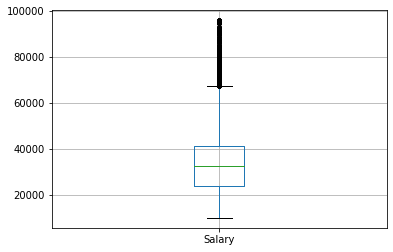

In [98]:
# Boxplot
_,bp = data.boxplot(column='Salary',sym='k.',return_type='both')



In [99]:
# outliers
outliers = [fliers.get_ydata() for fliers in bp["fliers"]] 

By looking at the above boxplot, it was observed that there are outliers in this column but since every salary record is required, it wouldn't be appropriate to remove these rows with outliers that were outside the interquartile range. Therefore, even after finding the outliers as shown below, these are not removed.

In [100]:
# Arraylist of outliers
outliers

[array([77500., 72500., 75000., ..., 71040., 75000., 70000.])]

In [101]:
# retrieve the indices that has outlier value in fare
condition = (data['Salary'] >= min(outliers[0]))
applies_indices = indices[condition]

    # update erlist
for ind in applies_indices:
    updateErrorList(ind, data.loc[ind,'Id'], 'Salary', data.loc[ind,'Salary'], data.loc[ind,'Salary'], 'Outliers',"Unchanged") 

### 2.3.8 Duplicated values
### Look for duplicated rows or columns 

To check whether there are any duplicated rows or columns in the dataset, duplicated() function was used here.

In [102]:
# Check for dupliccated rows/columns
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,Id,Title,Location,Company,ContractTime,ContractType,Category,Salary,OpenDate,CloseDate,SourceName


There were no duplicated rows or columns returned.

## Final Look at the Dataframe

In [103]:
# First 7 entries in the dataset
data.head(7)

,Id,Title,Location,Company,ContractTime,ContractType,Category,Salary,OpenDate,CloseDate,SourceName
0,68285763,Account Manager South West Renal,UK,Orrery Recruitment Ltd,permanent,non-specified,Healthcare & Nursing Jobs,45000.0,2013-08-08 00:00:00,2013-11-06 00:00:00,emedcareers.com
1,70344003,SCRA / SCRAII Progression,London,RBW Consulting Solutions Ltd,permanent,non-specified,Healthcare & Nursing Jobs,38000.0,2012-04-01 12:00:00,2012-06-30 12:00:00,emedcareers.com
2,69266181,Critical Care Advisor (Insurance Sector),London,Chadwick Nott,permanent,non-specified,Healthcare & Nursing Jobs,22500.0,2012-08-16 15:00:00,2012-10-15 15:00:00,emedcareers.com
3,71713141,Scientific Director Medical Communications,Manchester,Executive Facilities Limited,permanent,non-specified,Healthcare & Nursing Jobs,50000.0,2012-05-08 12:00:00,2012-06-07 12:00:00,emedcareers.com
4,68100927,Territory Manager Critical Care M62 Corridor,North West England,Remtec Search and Selection,permanent,non-specified,Healthcare & Nursing Jobs,36000.0,2013-05-09 15:00:00,2013-07-08 15:00:00,emedcareers.com
5,68100908,Area Sales Manager Ortho,East Midlands,G2 Healthcare Resourcing,permanent,non-specified,Healthcare & Nursing Jobs,35000.0,2013-08-19 00:00:00,2013-09-18 00:00:00,emedcareers.com
6,66906020,Nutrition Nurse Advisor,UK,Xcellin Ltd,contract,non-specified,Healthcare & Nursing Jobs,24500.0,2013-09-30 15:00:00,2013-10-14 15:00:00,emedcareers.com


In [104]:
# Shape of the dataframe
print("The shape of the final dataframe is: ", data.shape)

The shape of the final dataframe is:  (50702, 11)


In [105]:
# Overall infromation about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50702 entries, 0 to 50702
Data columns (total 11 columns):
Id              50702 non-null int64
Title           50702 non-null object
Location        50702 non-null object
Company         50702 non-null object
ContractTime    50702 non-null object
ContractType    50702 non-null object
Category        50702 non-null object
Salary          50702 non-null float64
OpenDate        50702 non-null datetime64[ns]
CloseDate       50702 non-null datetime64[ns]
SourceName      50702 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 7.1+ MB


In [106]:
# Summary Statistics 
data.describe()

,Id,Salary
count,5.070200e+04,50702.000000
mean,6.850745e+07,34535.745466
std,4.276034e+06,15252.464205
min,1.261263e+07,10000.000000
25%,6.823430e+07,23950.500000
50%,6.904464e+07,32500.000000
75%,7.064875e+07,41280.000000
max,7.269595e+07,96000.000000


## Saving data
The parsed and cleaned data as well as the error list is saved to:
- dataset1_solution.csv
- errorlist.csv

In [108]:
# code to save output data
data.to_csv('dataset1_solution.csv')
error_list.to_csv('errorlist.csv')

## Summary

In task 1, 
* The job advertisement data was parsed from an xml file
* The format and structure of the file was examined
* It was then parsed into a pandas dataframe with the corresponding attribute names
* The columns of this dataframe were Id, Title, Location, Company, ContractType, ContractTime, Category, Salary, OpenDate, CloseDate and SourceName

In task 2,
* The parsed dataset was audited and inspected thoroughly
* There were several problems found within the dataset such as, 
    - Typos and spelling mistakes
    - Irregularities, e.g., abnormal data values and data formats
    - Violations of the Integrity constraint.
    - Outliers
    - Duplications
    - Missing values
    - Inconsistency, e.g., inhomogeneity in values and types in representing the same data
* All these major data issues and generic problems were solved using different approaches
* Also, the incorrect datatypes were changed to the required format

There were two files generated at the end: 
1. <font color="purple"> <b> dataset1_solution.csv </b> </font> - This file contains the parsed and clean dataset
2. <font color="purple"> <b> errorlist.csv </b> </font> - It contains a list of all errors/problems found in the file